In [3]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [7]:
data_path = []
data_path.append('data\\BIG_plot003.txt')
data_path.append('data\\BIG_plot005.txt')
data_path.append('data\\BIG_plot01.txt')
data_path.append('data\\BIG_plot03.txt')


numberFigures = 4

In [12]:
data_values = []
dy = [0.003, 0.005, 0.01, 0.03]

for i in range(numberFigures):
    data = pd.read_csv(data_path[i], sep=",", header=None)
    data.columns = ['x(m)', 'Y']
    data = data.drop([0])  # Drop the first row which contains the old header

    # Convert the columns to numeric
    data['x(m)'] = pd.to_numeric(data['x(m)'])
    data['Y'] = pd.to_numeric(data['Y'])
    data_values.append(-data['Y'])
    x_values = data['x(m)']

print(data_values[3])
print(x_values)

1     0.456078
2     0.424380
3     0.418767
4     0.423324
5     0.430239
6     0.428111
7     0.422817
8     0.413840
9     0.399138
10    0.370158
11    0.319629
Name: Y, dtype: float64
1     1.000000e-09
2     2.000000e-09
3     3.000000e-09
4     5.000000e-09
5     1.000000e-08
6     2.000000e-08
7     3.000000e-08
8     4.000000e-08
9     5.000000e-08
10    6.000000e-08
11    7.000000e-08
Name: x(m), dtype: float64


[1.e-08 2.e-08 3.e-08 4.e-08 5.e-08 6.e-08 7.e-08]


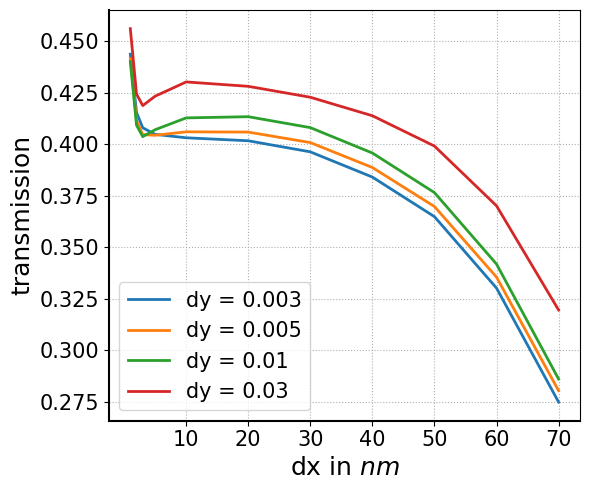

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))  # Adjust the figsize to fit your needs

xticks = x_values.to_numpy()[4:]
print(xticks)
xticklabels = np.linspace(10, 70, 7).astype(int)
tickslabelsize = 15
labelsize = 17
fontsize = 18

for i in range(numberFigures):
    ax.plot(x_values, data_values[i], marker='', linewidth = 2, linestyle='-', label = 'dy = {}'.format(dy[i]))


ax.ticklabel_format(style='plain', axis='x', useOffset = False)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.tick_params(axis = 'both', labelsize = tickslabelsize)
    
ax.legend(fontsize = tickslabelsize)
ax.grid(True, linestyle = ':')
# ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
# ax.spines['right'].set_linewidth(2)

ax.set_xlabel('dx in $nm$', fontsize = fontsize)
ax.set_ylabel('transmission', fontsize = fontsize)

plt.tight_layout()

plt.show()
fig.savefig('mesh.png', dpi=300)